In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

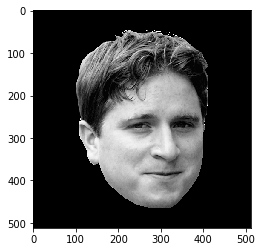

In [91]:
face_cascade = cv.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('xml/haarcascade_eye.xml')
img = cv.imread('img/kppa.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

161 162 451 452


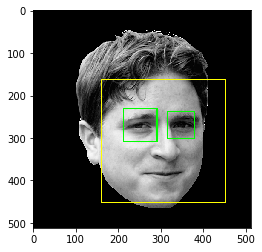

In [92]:
# Reconocimiento de rostro y ojos
imgRec=img.copy()
faces = face_cascade.detectMultiScale(imgRec, 1.3, 5)
for (x,y,w,h) in faces:
    cv.rectangle(imgRec,(x,y),(x+w,y+h),(255,255,0),2)
    #roi_gray = gray[y:y+h, x:x+w]
    roi_color = imgRec[y:y+h, x:x+w]
    #eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        #cv.Rectangle(img, pt1, pt2, color, thickness=1, lineType=8, shift=0) 
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        #cv.Circle(img, center, radius, color, thickness=1, lineType=8, shift=0)
        #cv.circle(roi_color, (ex+ew//2,ey+eh//2), 10,(0,255,9),20)
plt.imshow(imgRec, cmap='gray')
cv.imwrite("result/sv-1.png", imgRec)
print(x, y, x+w, y+h)

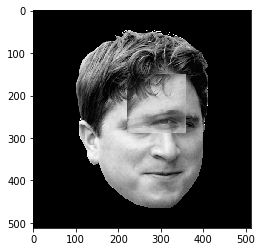

In [120]:
# Blending en un sector

# imagen fondo
imgB=img.copy() 
grayB=gray.copy()

# imagen para agregar
parte=grayB[160:300, 160:300] 
rows,cols=parte.shape

# puntos x,y donde aparecerá la mezcla
posx=150
posy=220

# realizo la mezcla
mezcla=cv.addWeighted(grayB[posx:rows+posx:1, posy:cols+posy:1],0.25,parte[::1,::1],0.75,0)

# sustituir con la mezcla
grayB[posx:rows+posx:1, posy:cols+posy:1]=mezcla[::1,::1]
plt.imshow(grayB,cmap='gray')

(512, 512, 3)
(512, 512, 3)


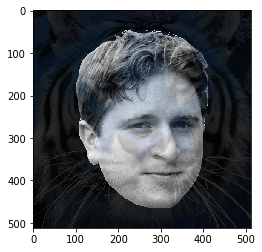

In [156]:
# Image Blending
imgMask= cv.imread('img/mask.jpg')
imgC=img.copy()

dst = cv.addWeighted(imgC,0.8,imgMask,0.2,0) # imagen, peso
plt.imshow(dst)
print(imgC.shape)
print(imgMask.shape)

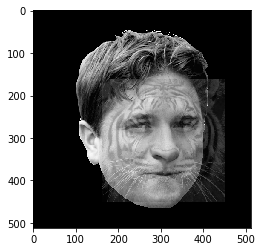

In [157]:
# Blending en un sector

# imagen fondo
imgB=img.copy() 
grayB=gray.copy()

# imagen para agregar
gray2 = cv.cvtColor(imgMask, cv.COLOR_BGR2GRAY)

#res = cv.resize(imgC, (100, 50)) 
#print(x, y, x+w, y+h)
#161 162 451 452

parte=cv.resize(gray2,(w,h))
#gray2[110:300, 110:300] 
rows,cols=parte.shape

# puntos x,y donde aparecerá la mezcla
posx=x #150
posy=y #220

# realizo la mezcla
mezcla=cv.addWeighted(grayB[posx:rows+posx:1, posy:cols+posy:1],0.2,parte[::1,::1],0.8,0)

# sustituir con la mezcla
#grayB[posx:rows+posx:1, posy:cols+posy:1]=mezcla[::1,::1]*0.2

grayB[posx:rows+posx:1, posy:cols+posy:1]=cv.addWeighted(grayB[posx:rows+posx:1, posy:cols+posy:1],0.6,mezcla,0.4,0)

plt.imshow(grayB,cmap='gray')

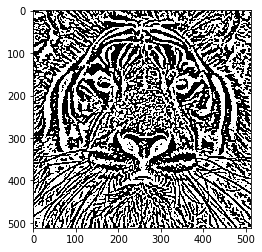

In [158]:
# filtro pasabajo: gaussiano
# filtro pasaalto: laplaciano
gray2 = cv.cvtColor(imgMask, cv.COLOR_BGR2GRAY)
laplacian = cv.Laplacian(gray2,cv.CV_8U,ksize=17)
plt.imshow(laplacian,cmap='gray')

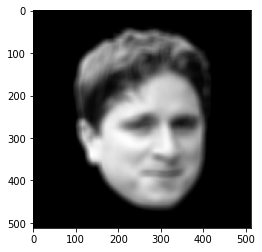

In [159]:
blur = cv.blur(gray,(17,17))
plt.imshow(blur,cmap='gray')

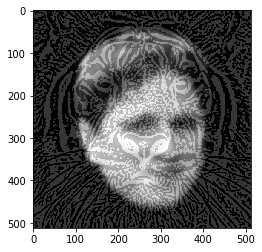

In [160]:
mezcla2=cv.addWeighted(blur,0.8,laplacian,0.2,0)
plt.imshow(mezcla2, cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x1b234b50>,
 <matplotlib.image.AxesImage at 0x1b79f090>)

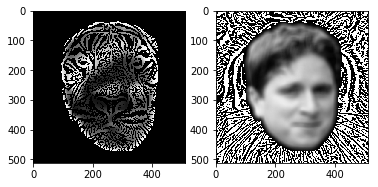

In [161]:
mezcla3=laplacian*blur
mezcla4=laplacian+blur
plt.subplot(121), plt.imshow(mezcla3, cmap='gray')
plt.subplot(122), plt.imshow(mezcla4, cmap='gray')

True

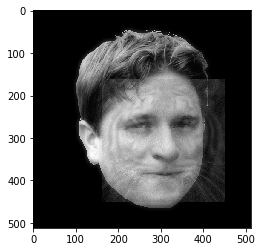

In [172]:
mezcla5= cv.addWeighted(gray,0.6,blur,0.4,0)
mezcla6=cv.addWeighted(gray2,0.8,laplacian,0.2,0)

parteMezcla= cv.resize(mezcla6,(w,h))
posx=x
posy=y 

mezcla5[posx:rows+posx:1, posy:cols+posy:1]=cv.addWeighted(mezcla5[posx:rows+posx:1, posy:cols+posy:1],0.7,parteMezcla,0.3,0)

#mezcla7=cv.addWeighted(mezcla5,0.8,mezcla6,0.2,0)

plt.imshow(mezcla5, cmap='gray')
cv.imwrite("result/sv-3.png", mezcla5)